# Proyecto 2

In [1]:
#Importamos los paquetes a utilizar
import numpy as np #Para el uso de arrays
import matplotlib.pyplot as plt #Para hacer gráficas

Queremos resolver la ecuación

$$\dfrac{d^2\theta}{dt^2}+\nu\dfrac{d\theta}{dt}+\sin\theta=\tau\sin(2\pi f t)$$

Con las transformaciones

$$x_1=\theta$$
$$x_2=\dfrac{d\theta}{dt}$$
$$x_3=2\pi ft$$

Con lo que obtenemos

\begin{align}
\dfrac{dx_1}{dt}=x2
\tag{1}
\end{align}

\begin{align}
\dfrac{dx_2}{dt}=\tau\sin(x_3)-\nu x_2-\sin(x_1)
\tag{2}
\end{align}

\begin{align}
\dfrac{dx_3}{dt}=2\pi f
\tag{3}
\end{align}

In [2]:
#Definimos las funciones de las variables
def fun1(x1,x2,x3,nu,tau,f): #Ecuación 1
    return x2
def fun2(x1,x2,x3,nu,tau,f): #Ecuación 2
    return tau*np.sin(x3)-nu*x2-np.sin(x1)
def fun3(x1,x2,x3,nu,tau,f): #Ecuación 3
    return 2*np.pi*f


In [3]:
#Definimos la función módulo para los gráficos
def Mod2pi(x):
    return (x-np.pi)%(2*np.pi)-np.pi

In [4]:
#Metodo de Runge Kutta de cuarto orden
def SystemSolver(h,n,nu,tau,f,x0,v0,t0):
    k=np.zeros((3,4)) #Matriz de k_nj
    x=np.zeros((3,n)) #Matriz de x_ij
    t=np.zeros(n)   #Array de tiempos
    #Establecemos las condiciones iniciales
    t[0]=t0
    x[0,0]=x0
    x[1,0]=v0
    x[2,0]=2*np.pi*t[0]

    for i in range(n-1):

        #Calculamos los x a usar para los k_1j
        # x_ij
        x1 = x[0,i]
        x2 = x[1,i]
        x3 = x[2,i]

        #Calculamos k_1j(los indices en el código están invertidas respecto a las ecuaciones del informe) 
        k[0,0] = fun1(x1,x2,x3,nu,tau,f)
        k[1,0] = fun2(x1,x2,x3,nu,tau,f)
        k[2,0] = fun3(x1,x2,x3,nu,tau,f)

        #Calculamos los x a usar para los k_2j
        #x_ij+h/2*k_1j
        x1 = x[0,i] + k[0,0]*h/2.0 
        x2 = x[1,i] + k[1,0]*h/2.0
        x3 = x[2,i] + k[2,0]*h/2.0


        #Calculamos k_2j
        k[0,1] = fun1(x1,x2,x3,nu,tau,f)
        k[1,1] = fun2(x1,x2,x3,nu,tau,f)
        k[2,1] = fun3(x1,x2,x3,nu,tau,f)
        
        #Calculamos los x a usar para los k_3j
        #x_ij+h/2*k_2j
        x1 = x[0,i] + k[0,1]*h/2.0
        x2 = x[1,i] + k[1,1]*h/2.0
        x3 = x[2,i] + k[2,1]*h/2.0

        #Calculamos k_3j
        k[0,2] = fun1(x1,x2,x3,nu,tau,f)
        k[1,2] = fun2(x1,x2,x3,nu,tau,f)
        k[2,2] = fun3(x1,x2,x3,nu,tau,f)

        #Calculamos los x a usar para los k_4j
        #x_ij+h*k_3j
        x1 = x[0,i] + k[0,2]*h
        x2 = x[1,i] + k[1,2]*h
        x3 = x[2,i] + k[2,2]*h

        #Calculamos k_4j
        k[0,3] = fun1(x1,x2,x3,nu,tau,f)
        k[1,3] = fun2(x1,x2,x3,nu,tau,f)
        k[2,3] = fun3(x1,x2,x3,nu,tau,f)

        #Calculamos el valor de x_{i+1,j}
        for j in range(3):
            x[j,i+1]=x[j,i]+h/6.0*(k[j,0]+2.0*k[j,1]+2.0*k[j,2]+k[j,3])
        #Se calcula el tiempo t_ij
        t[i+1]=t[i]+h
    return x,t

Para los parámetros $\nu=0.5, \tau=0.90, f=\frac{1}{6\pi}$

In [5]:
n=100000 #Número de iteraciones
h=0.01  #Espaciado entre las iteraciones
#Condiciones iniciales
t0=0
v0=0
x0=np.pi/6
x01=-np.pi/6
x02=np.pi/2

In [6]:
#Parámetros de la ecuación
nu=0.5 #Inercia
tau=0.90 #Amplitud del torque
f=1/(6*np.pi) #Frecuencia
#Array del tiempo

In [7]:
#Soluciones numéricas para varias condiciones iniciales
x11,t1=SystemSolver(h,n,nu,tau,f,x0,v0,t0)  
x12,t1=SystemSolver(h,n,nu,tau,f,x0+0.001,v0+0.001,t0)
x13,t1=SystemSolver(h,n,nu,tau,f,x0+0.0001,v0+0.0001,t0)
x14,t1=SystemSolver(h,n,nu,tau,f,x01,v0,t0)
x15,t1=SystemSolver(h,n,nu,tau,f,x02,v0,t0)

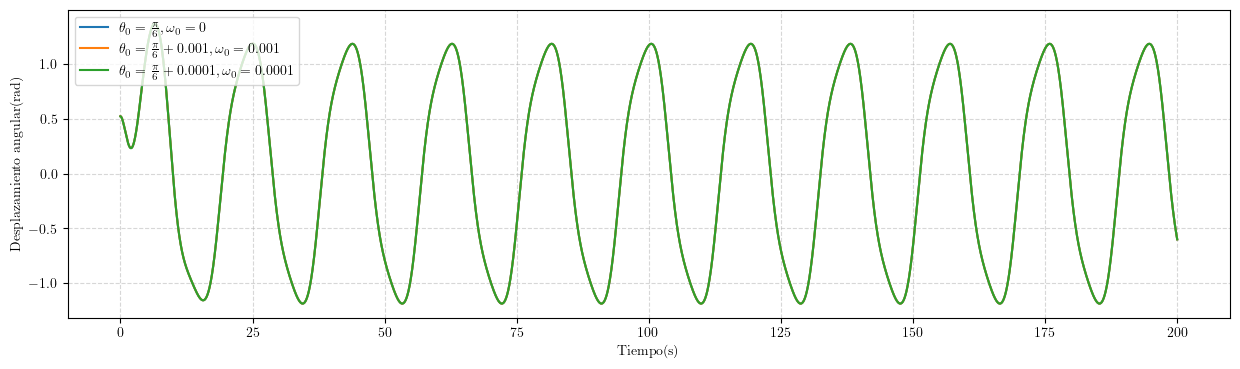

In [27]:
#Gráfica del desplazamiento angular condiciones inciales muy próximas
fig,ax=plt.subplots(figsize=(15,4))
#Establece la fuente de texto en formato de latex 
#Para usarlo se debe compilar dos veces la primera vez
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.plot(t1[:20000],Mod2pi(x11[0,:20000]), label=r'$\theta_0=\frac{\pi}{6}, \omega_0=0$')
plt.plot(t1[:20000],Mod2pi(x12[0,:20000]), label=r'$\theta_0=\frac{\pi}{6}+0.001, \omega_0=0.001$')
plt.plot(t1[:20000],Mod2pi(x13[0,:20000]), label=r'$\theta_0=\frac{\pi}{6}+0.0001, \omega_0=0.0001$')
plt.ylabel("Desplazamiento angular(rad)")
plt.xlabel("Tiempo(s)")
plt.grid(linestyle="--",alpha=0.5)
#Muestra la leyenda en la parte superior izquierda
plt.legend(loc=2)
plt.savefig("t0901.pdf")

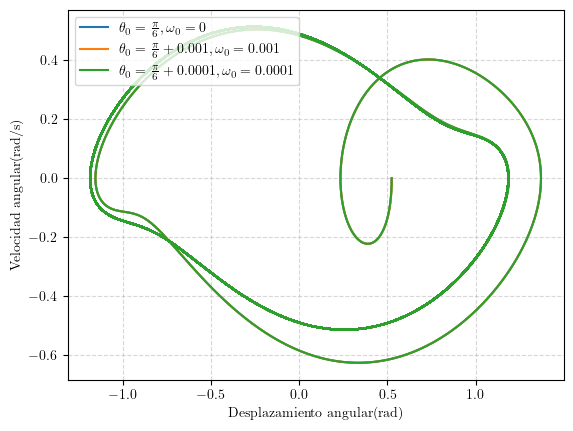

In [9]:
#Gráfica del diagrama de fase condiciones inciales muy próximas
plt.plot(Mod2pi(x11[0]), x11[1], label=r'$\theta_0=\frac{\pi}{6}, \omega_0=0$')
plt.plot(Mod2pi(x12[0]), x12[1],  label=r'$\theta_0=\frac{\pi}{6}+0.001, \omega_0=0.001$')
plt.plot(Mod2pi(x13[0]), x13[1],  label=r'$\theta_0=\frac{\pi}{6}+0.0001, \omega_0=0.0001$')
plt.xlabel("Desplazamiento angular(rad)")
plt.ylabel("Velocidad angular(rad/s)")
plt.grid(linestyle="--",alpha=0.5)
#Muestra la leyenda en la parte superior izquierda
plt.legend(loc=2)
plt.savefig("t0902a.pdf")

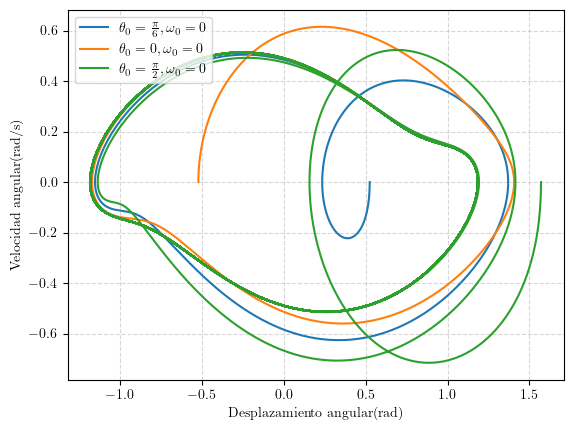

In [10]:
#Gráfica de diagrama de fase para condiciones inciales lejanas
plt.plot(Mod2pi(x11[0]), x11[1], label=r'$\theta_0=\frac{\pi}{6}, \omega_0=0$')
plt.plot(Mod2pi(x14[0]), x14[1],  label=r'$\theta_0=0, \omega_0=0$')
plt.plot(Mod2pi(x15[0]), x15[1],  label=r'$\theta_0=\frac{\pi}{2}, \omega_0=0$')
plt.xlabel("Desplazamiento angular(rad)")
plt.ylabel("Velocidad angular(rad/s)")
plt.grid(linestyle="--",alpha=0.5)
#Muestra la leyenda en la parte superior izquierda
plt.legend(loc=2)
plt.savefig("t0902b.pdf")

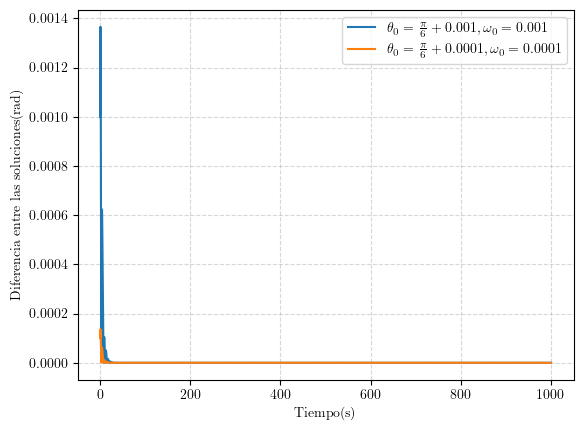

In [11]:
#Gráfica para diferencia de errores entre la condiciones iniciales próximas
delta_x1=np.abs(x11[0]-x12[0])
delta_x2=np.abs(x11[0]-x13[0])
plt.plot(t1,delta_x1, label=r'$\theta_0=\frac{\pi}{6}+0.001, \omega_0=0.001$')
plt.plot(t1,delta_x2, label=r'$\theta_0=\frac{\pi}{6}+0.0001, \omega_0=0.0001$')
plt.ylabel("Diferencia entre las soluciones(rad)")
plt.xlabel("Tiempo(s)")
plt.grid(linestyle="--",alpha=0.5)
#Muestra la leyenda en la parte superior izquierda
plt.legend()
plt.savefig("t0903.pdf")

Para los parámetros $\nu=0.5, \tau=1.07, f=\frac{1}{6\pi}$

In [12]:
n=100000 #Número de iteraciones
h=0.01  #Espaciado entre las iteraciones
#Condiciones iniciales
t0=0
v0=0
x0=np.pi/6
x01=0
x02=-np.pi/6
x03=np.pi/2
x04=np.pi/3

In [13]:
#Parámetros de la ecuación
nu=0.5 #Inercia
tau=1.07 #Amplitud del torque
f=1/(6*np.pi) #Frecuencia
#Array del tiempo
t=np.zeros(n)
t[0]=t0

In [14]:
#Soluciones numéricas para varias condiciones iniciales
x21,t2=SystemSolver(h,n,nu,tau,f,x0,v0,t0)
x22,t2=SystemSolver(h,n,nu,tau,f,x0+0.001,v0+0.001,t0)
x23,t2=SystemSolver(h,n,nu,tau,f,x0+0.0001,v0+0.0001,t0)
x24,t2=SystemSolver(h,n,nu,tau,f,x01,v0,t0)
x25,t2=SystemSolver(h,n,nu,tau,f,x02,v0,t0)
x26,t2=SystemSolver(h,n,nu,tau,f,x03,v0,t0)
x27,t2=SystemSolver(h,n,nu,tau,f,x04,v0,t0)

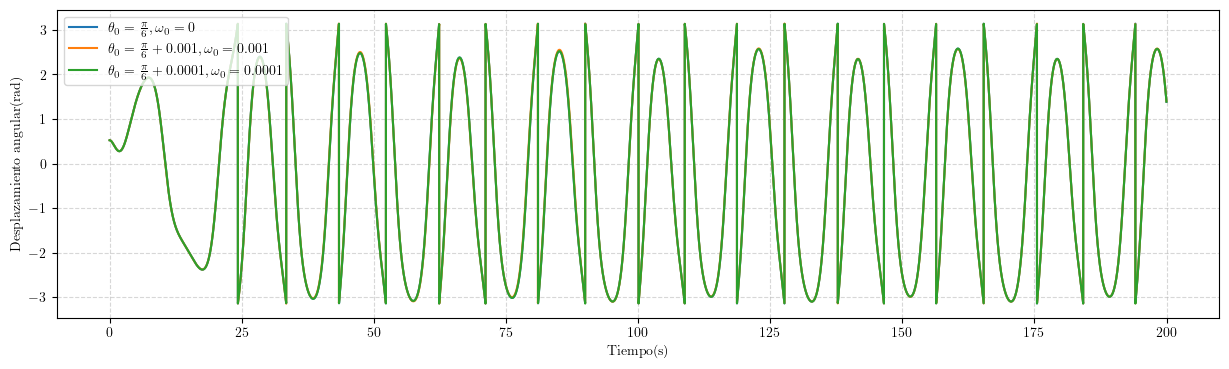

In [15]:
fig,ax=plt.subplots(figsize=(15,4))
#Establece la fuente de texto en formato de latex 
#Para usarlo se debe compilar dos veces la primera vez
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.plot(t2[:20000],Mod2pi(x21[0,:20000]), label=r'$\theta_0=\frac{\pi}{6}, \omega_0=0$')
plt.plot(t2[:20000],Mod2pi(x22[0,:20000]), label=r'$\theta_0=\frac{\pi}{6}+0.001, \omega_0=0.001$')
plt.plot(t2[:20000],Mod2pi(x23[0,:20000]), label=r'$\theta_0=\frac{\pi}{6}+0.0001, \omega_0=0.0001$')
plt.ylabel("Desplazamiento angular(rad)")
plt.xlabel("Tiempo(s)")
plt.grid(linestyle="--",alpha=0.5)
#Muestra la leyenda en la parte superior izquierda
plt.legend(loc=2)
plt.savefig("t1071.pdf")

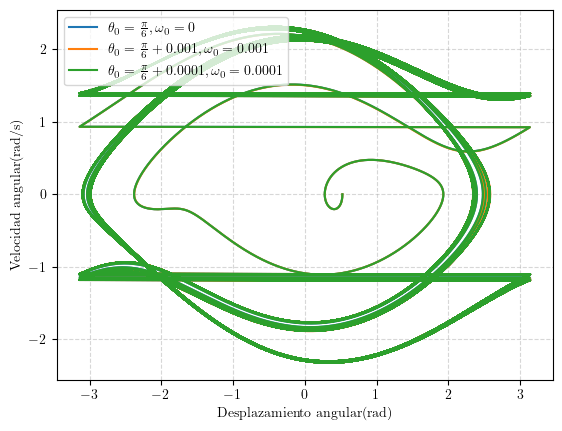

In [16]:
#Gráfica del diagrama de fase condiciones inciales muy próximas
plt.plot(Mod2pi(x21[0]), x21[1],label=r'$\theta_0=\frac{\pi}{6}, \omega_0=0$')
plt.plot(Mod2pi(x22[0]),x22[1], label=r'$\theta_0=\frac{\pi}{6}+0.001, \omega_0=0.001$')
plt.plot(Mod2pi(x23[0]), x23[1],label=r'$\theta_0=\frac{\pi}{6}+0.0001, \omega_0=0.0001$')
plt.xlabel("Desplazamiento angular(rad)")
plt.ylabel("Velocidad angular(rad/s)")
plt.grid(linestyle="--",alpha=0.5)
#Muestra la leyenda en la parte superior izquierda
plt.legend(loc=2)
plt.savefig("t1072a.pdf")

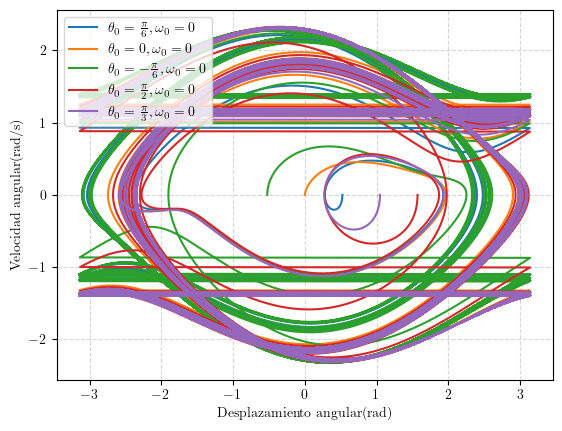

In [17]:
#Gráfica del diagrama de fase condiciones inciales lejanas
plt.plot(Mod2pi(x21[0]), x21[1],label=r'$\theta_0=\frac{\pi}{6}, \omega_0=0$')
plt.plot(Mod2pi(x24[0]), x24[1],label=r'$\theta_0=0, \omega_0=0$')
plt.plot(Mod2pi(x25[0]), x25[1],label=r'$\theta_0=-\frac{\pi}{6}, \omega_0=0$')
plt.plot(Mod2pi(x26[0]), x26[1],label=r'$\theta_0=\frac{\pi}{2}, \omega_0=0$')
plt.plot(Mod2pi(x27[0]), x27[1],label=r'$\theta_0=\frac{\pi}{3}, \omega_0=0$')
plt.xlabel("Desplazamiento angular(rad)")
plt.ylabel("Velocidad angular(rad/s)")
plt.grid(linestyle="--",alpha=0.5)
#Muestra la leyenda en la parte superior izquierda
plt.legend(loc=2)
plt.savefig("t1072b.pdf")

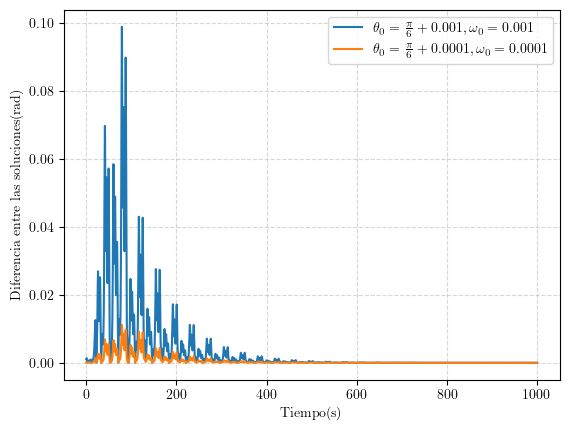

In [18]:
#Gráfica del diagrama de fase condiciones inciales muy próximas
delta_x1=np.abs(x21[0]-x22[0])
delta_x2=np.abs(x21[0]-x23[0])
plt.plot(t2,delta_x1, label=r'$\theta_0=\frac{\pi}{6}+0.001, \omega_0=0.001$')
plt.plot(t2,delta_x2, label=r'$\theta_0=\frac{\pi}{6}+0.0001, \omega_0=0.0001$')
plt.ylabel("Diferencia entre las soluciones(rad)")
plt.xlabel("Tiempo(s)")
plt.grid(linestyle="--",alpha=0.5)
#Muestra la leyenda en la parte superior izquierda
plt.legend()
plt.savefig("t1073.pdf")

Para los parámetros $\nu=0.5, \tau=1.15, f=\frac{1}{6\pi}$

In [19]:
n=100000 #Número de iteraciones
h=0.01  #Espaciado entre las iteraciones
#Condiciones iniciales
t0=0
v0=0
x0=np.pi/6

In [20]:
#Parámetros de la ecuación
nu=0.5 #Inercia
tau=1.15 #Amplitud del torque
f=1/(6*np.pi) #Frecuencia
#Array del tiempo
t=np.zeros(n)
t[0]=t0
#Parámetros originales
x=np.zeros((3,n))
#Parámetros con una ligera desviación
x1=np.zeros((3,n))
x2=np.zeros((3,n))

In [21]:
#Soluciones numéricas para varias condiciones iniciales
x31,t3=SystemSolver(h,n,nu,tau,f,x0,v0,t0)
x32,t3=SystemSolver(h,n,nu,tau,f,x0+0.001,v0+0.001,t0)
x33,t3=SystemSolver(h,n,nu,tau,f,x0+0.0001,v0+0.0001,t0)

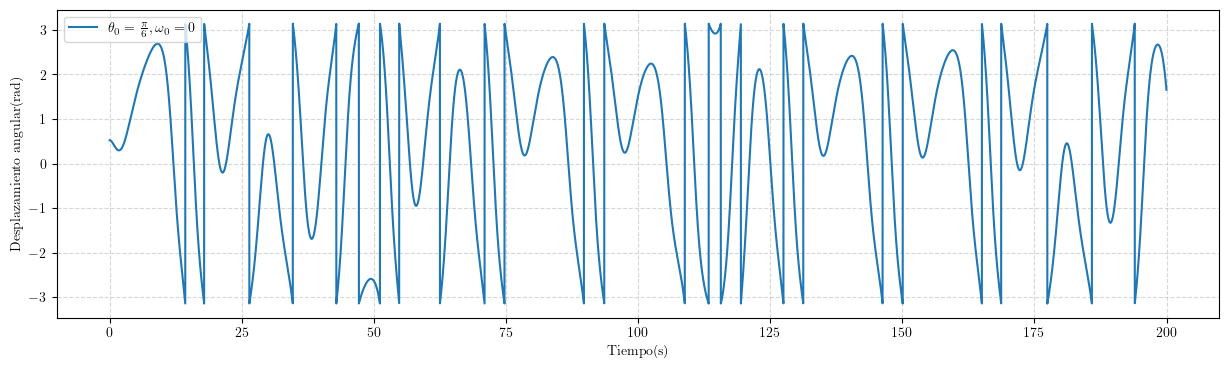

In [22]:
#Gráfica para diferencia de errores entre la condiciones iniciales próximas
fig,ax=plt.subplots(figsize=(15,4))
#Establece la fuente de texto en formato de latex 
#Para usarlo se debe compilar dos veces la primera vez
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.plot(t3[:20000],Mod2pi(x31[0,:20000]), label=r'$\theta_0=\frac{\pi}{6}, \omega_0=0$')
plt.ylabel("Desplazamiento angular(rad)")
plt.xlabel("Tiempo(s)")
plt.grid(linestyle="--",alpha=0.5)
#Muestra la leyenda en la parte superior izquierda
plt.legend(loc=2)
plt.savefig("t1150.pdf")


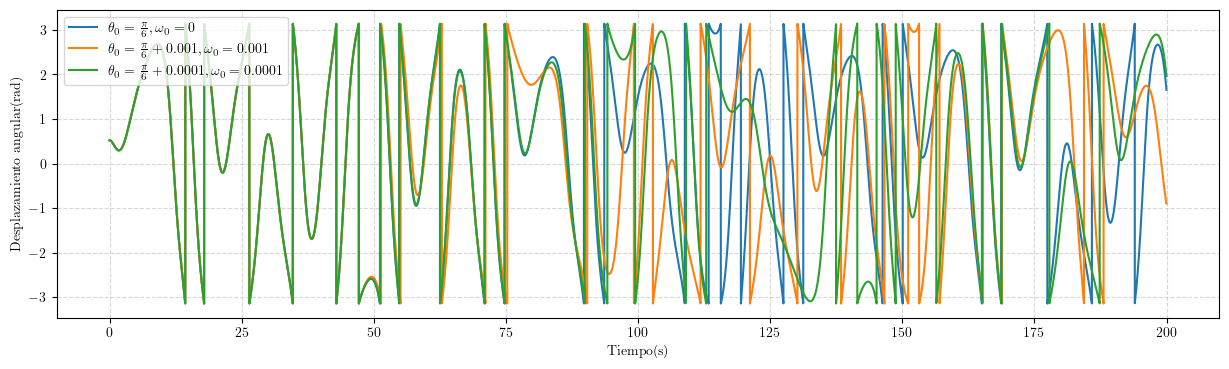

In [23]:
fig,ax=plt.subplots(figsize=(15,4))
#Establece la fuente de texto en formato de latex 
#Para usarlo se debe compilar dos veces la primera vez
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.plot(t3[:20000],Mod2pi(x31[0,:20000]), label=r'$\theta_0=\frac{\pi}{6}, \omega_0=0$')
plt.plot(t3[:20000],Mod2pi(x32[0,:20000]), label=r'$\theta_0=\frac{\pi}{6}+0.001, \omega_0=0.001$')
plt.plot(t3[:20000],Mod2pi(x33[0,:20000]), label=r'$\theta_0=\frac{\pi}{6}+0.0001, \omega_0=0.0001$')
plt.ylabel("Desplazamiento angular(rad)")
plt.xlabel("Tiempo(s)")
plt.grid(linestyle="--",alpha=0.5)
#Muestra la leyenda en la parte superior izquierda
plt.legend(loc=2)
plt.savefig("t1151.pdf")

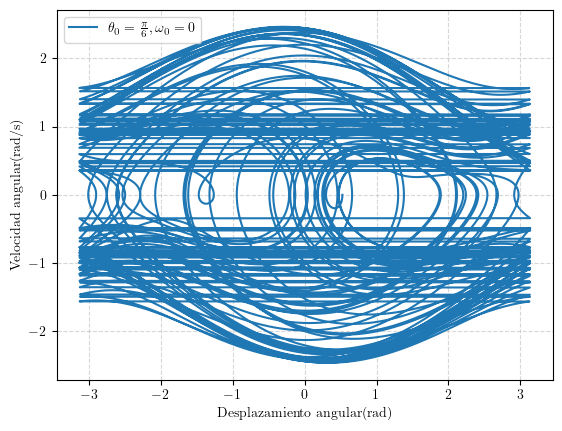

In [24]:
#Gráfica del diagrama de fase para un intervalo inicial
plt.plot(Mod2pi(x31[0,:50000]), x31[1,:50000], label=r'$\theta_0=\frac{\pi}{6}, \omega_0=0$')
plt.xlabel("Desplazamiento angular(rad)")
plt.ylabel("Velocidad angular(rad/s)")
plt.grid(linestyle="--",alpha=0.5)
#Muestra la leyenda en la parte superior izquierda
plt.legend(loc=2)
plt.savefig("t1152a.pdf")

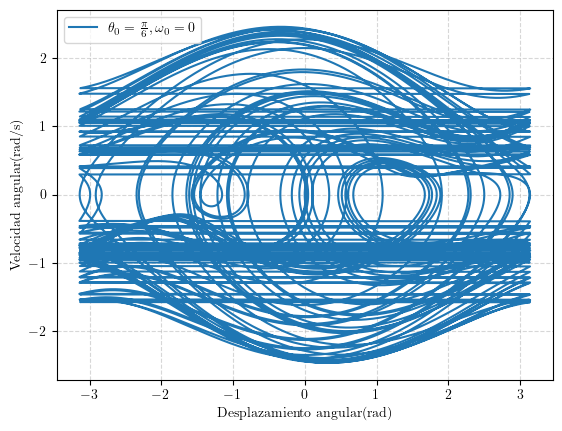

In [25]:
#Gráfica del diagrama de fase para un intervalo final
plt.plot(Mod2pi(x31[0,50000:]), x31[1,50000:], label=r'$\theta_0=\frac{\pi}{6}, \omega_0=0$')
plt.xlabel("Desplazamiento angular(rad)")
plt.ylabel("Velocidad angular(rad/s)")
plt.grid(linestyle="--",alpha=0.5)
#Muestra la leyenda en la parte superior izquierda
plt.legend(loc=2)
plt.savefig("t1152b.pdf")

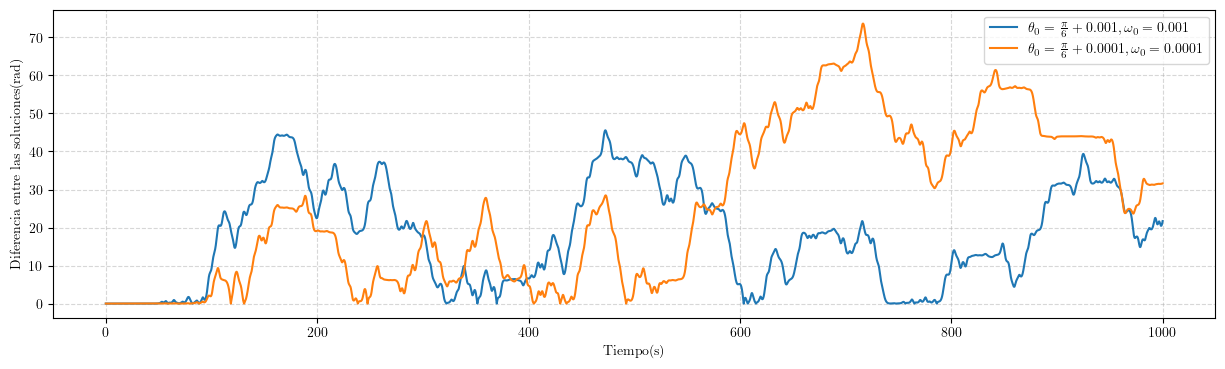

In [26]:
#Gráfica para diferencia de errores entre la condiciones iniciales próximas
fig,ax=plt.subplots(figsize=(15,4))
delta_x1=np.abs(x31[0]-x32[0])
delta_x2=np.abs(x31[0]-x33[0])
plt.plot(t3,delta_x1, label=r'$\theta_0=\frac{\pi}{6}+0.001, \omega_0=0.001$')
plt.plot(t3,delta_x2, label=r'$\theta_0=\frac{\pi}{6}+0.0001, \omega_0=0.0001$')
plt.ylabel("Diferencia entre las soluciones(rad)")
plt.xlabel("Tiempo(s)")
plt.grid(linestyle="--",alpha=0.5)
#Muestra la leyenda en la parte superior izquierda
plt.legend()
plt.savefig("t1153.pdf")